# Operation Mind Shield: Decoding Alzheimer's
#### **Full Name:** Olivia Hinson
#### **Link to SDS Profile:** https://community.superdatascience.com/u/0c9f4b64

---

**Project Objective**

The ultimate goal is to build and deploy a predictive model that can accurately distinguish between patients with and without Alzheimer’s, potentially paving the way for early diagnosis and improved patient outcomes.

**Mission Brief**

In this mission, you will work with a highly sensitive dataset containing crucial information about patients who may or may not be afflicted with Alzheimer’s disease. Your task is to analyze this data and develop a predictive model, with the complexity of your mission depending on the level of difficulty you choose.

---

## Assignment 2: The Specialist - Intermediate Level

You’ve proven yourself, Agent. Now, it’s time to take on more complex challenges. As a Specialist, you’ll need to dive deeper into the data and utilize more advanced techniques to build a robust predictive model. This assignment is for those with a solid foundation in data science, looking to sharpen their skills.

**Data Cleaning & Feature Selection**: Engage in a more elaborate data cleaning process. This includes handling outliers, imputing missing data with advanced techniques, and conducting a single step of feature selection to enhance your model’s performance.

**Model Building**: Move beyond the basics and build more sophisticated models, such as Gradient Boosting Machines or Random Forests. Incorporate some hyperparameter tuning to refine your model.

**Evaluation**: Evaluate your model using k-fold cross-validation to ensure its robustness across different subsets of the data. Your mission is to strike a balance between complexity and performance.

In [7]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

In [8]:
# Store CSV file in variable 
data = r'..\..\data\alzheimers_disease_data.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(data)

In [9]:
# Set options to view all columns instead of truncating columns
pd.set_option('display.max_columns', None)

# Print dataframe to confirm successful loading
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


### 1. Data Cleaning

#### Check for correct data types

In [12]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Some columns might need to be converted to categorical/object data type, but will hold off for now

#### Remove Any NULL and Duplicate Values

In [15]:
# Check for missing values 
print(df.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [16]:
# Check for duplicate entries
df[df.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge


There doesn't appear to be any NULL or duplicate values. Let's continue with analysis

#### Remove Columns To Avoid Any Bias and Imbalance

We now want to remove some variables from the dataframe to further enhance feature selection

To build a reliable and fair Alzheimer prediction model, it's essential to remove columns that could lead to information leakage. This happens when we include data that wouldn't be available at prediction time. By excluding these columns, our model learns from valid predictive features, ensuring it performs accurately in real-world scenarios.

In [19]:
# List all columns 
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

**PatientID** can also be removed since these are individual patients and not something we can use for our model 

**DoctorInCharge** should be removed since the information is confidential anyway and will not have any significance for what we are trying to solve

**EducationLevel** can be removed due to not having any impact on diagnosing with Alzheimers

**FamilyHistoryAlzheimers** needs to be removed since this might cause information leakage when we build our predictive model 

In [21]:
# Drop columns due to information leakage and to enhance feature selection capabilities 
# This prevents giving answers to what we already know and allows the model to determine answers based on valid predictive features
df.drop(['PatientID', 'EducationLevel', 'FamilyHistoryAlzheimers',  'DoctorInCharge'], axis=1, inplace=True)

print("Columns remaining: ", df.shape[1])

Columns remaining:  31


In [22]:
# View all data again 
df

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,17.795882,0,19.555085,7.844988,1.826335,9.673574,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,15.299911,0,8.674505,6.354282,1.263427,8.322874,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


### 2. Exploratory Data Analysis (EDA)

#### How many people were diagnosed with Alzheimer's? 

Let's see if we have any class imbalance and the proportion of people diagnosed with Alzheimer's disease

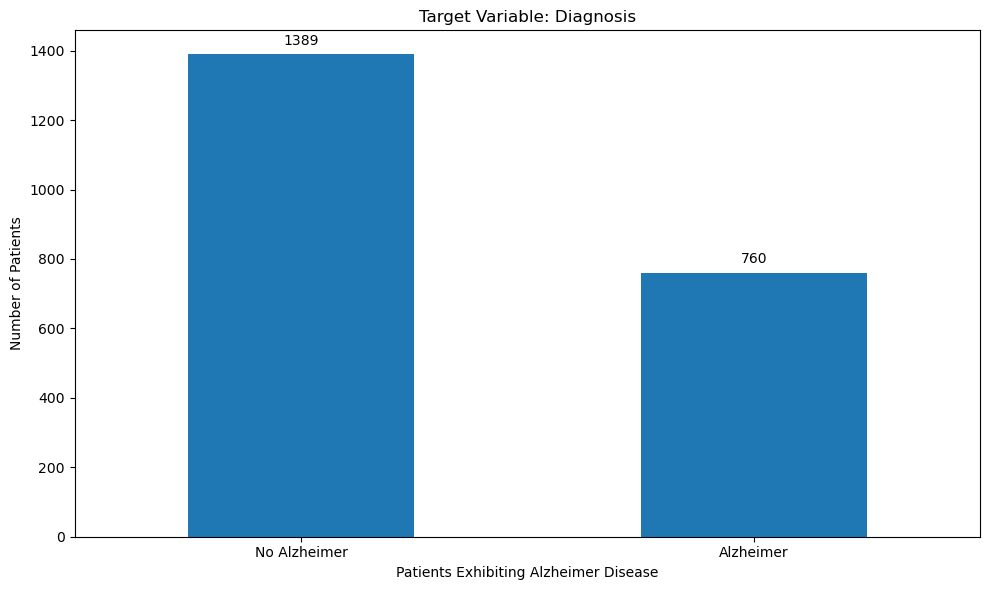

Diagnosis
0    64.634714
1    35.365286
Name: count, dtype: float64


In [25]:
# Count the occurrences of flight delays
alzheimer_counts = df['Diagnosis'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = alzheimer_counts.plot(kind='bar')

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.xlabel('Patients Exhibiting Alzheimer Disease')
plt.ylabel('Number of Patients')
plt.title('Target Variable: Diagnosis')
plt.xticks(ticks=[0, 1], rotation=0, labels=['No Alzheimer', 'Alzheimer'], ha='center')  # Rotate x-axis labels for better visibility and define labels 
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print((df['Diagnosis'].value_counts()/df.shape[0]) * 100)

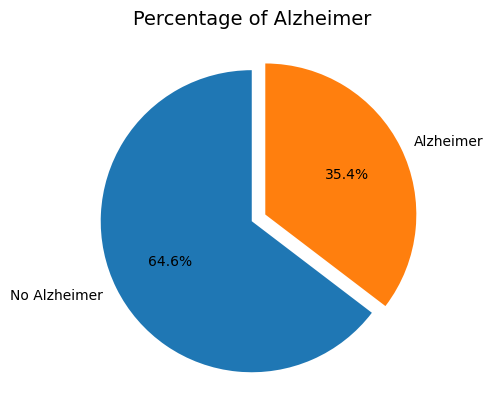

In [26]:
# Visualizing Alzheimer Disease Percentage

# Extract total number of on time and delayed flights
no_alzheimer, alzheimer = df['Diagnosis'].value_counts()

# Data and Labels
data = [no_alzheimer, alzheimer]
keys = ['No Alzheimer', 'Alzheimer']

# Pie Chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    labels=keys,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1]
)

# Adjusting Figure Size
fig.set_size_inches(5, 5)

# Title and Layout Adjustments
plt.title('Percentage of Alzheimer', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

Key Observations

**Class Distribution**
- No Alzheimer (0): The pie chart shows that **64.6%**, or **1,389**, of patients in the dataset do not have Alzheimer's disease
- Alzheimer (1): The pie chart shows that **35.4%**, or **760**, of patients in the dataset have Alzheimer's disease

**Class Imbalance**
- This dataset is clearly imbalanced. There are significantly more pateints (64.6%) that do not have Alzheimer's disease comapred to those that do have it (35.4%)
- This imbalance could impact how our predictive model distinguishes between patients with and without Alzheimer's, meaning it would create bias within the data to make our model lean more towards one outcome than another
- Our model needs to have an equally distributed number of classes to ensure accurate predictions and less bias
- Later down the line, we need to consider some techniques for creating a balanced dataset, such as oversampling the minority class (e.g., using SMOTE), downsampling the majority class to match the minority class, or applying class weighting to handle this imbalance effectively

#### Descriptive Statistics

In [29]:
# Create another df to look at descriptive statistics for certain variables (columns)
df_describe = df[['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']]

In [30]:
df_describe.describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496
std,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194
25%,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222
50%,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983
75%,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046
max,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862


#### What kind of distribution does Age present? 

Is there a particular Age group where Alzheimers shows up? 

C:\Users\ohins\anaconda3\envs\Python3_12_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


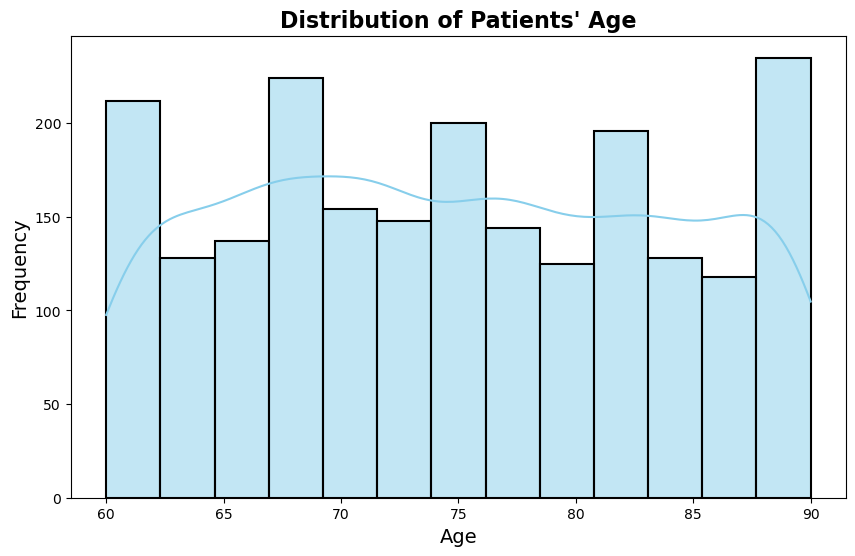

In [32]:
# Create a histogram with KDE (Kernel Density Estimate) for the Age distribution
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
# KDE allows us to visaulize the distribution of data in a dataset 
# Shows probability density function (PDF) - similar to histogram except it shows a continuous curve 
sns.histplot(df['Age'], kde=True, color='skyblue', edgecolor='black', linewidth=1.5)

# Add title and labels with improved formatting
plt.title('Distribution of Patients\' Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.grid(False)
plt.show()

Key Observations 

**Age Distribution**
- Age appears to be uniformly distributed across different age groups, ranging from 60 to 90 years old
- There are several age groups with slightly higher frequencies (60, 70, 75, and 90)

**Kernel Density Estimate (KDE)**
- The light blue line provides a smoothed estimation of the distribution
- The distribution is relatively flat except for small peaks around 70 and 90

Overall, there doesn't appear to be a particular age group where one overtakes the other. It looks like our model will not be overly biassed towards age when distinguishing between people with Alzheimers and those without. 

#### What kind of distribution does BMI present?

C:\Users\ohins\anaconda3\envs\Python3_12_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


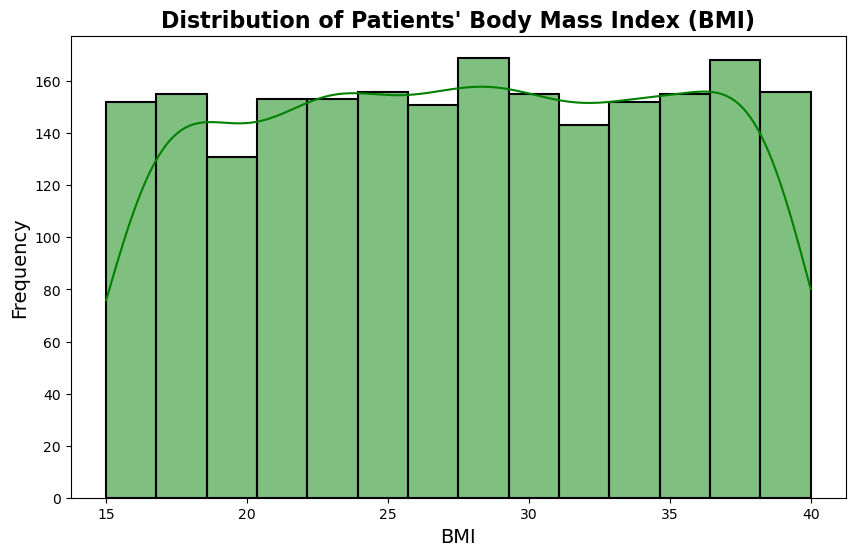

In [35]:
# Create a histogram with KDE (Kernel Density Estimate) for the Age distribution
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
# KDE allows us to visaulize the distribution of data in a dataset 
# Shows probability density function (PDF) - similar to histogram except it shows a continuous curve 
sns.histplot(df['BMI'], kde=True, color='green', edgecolor='black', linewidth=1.5)

# Add title and labels with improved formatting
plt.title('Distribution of Patients\' Body Mass Index (BMI)', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.grid(False)
plt.show()

Key Observations

**BMI Distribution**
- BMI seems to be uniformly distributed across different BMI groups, ranging from 15 to 40.
- BMI seems to have a wide variation among patients

**Kernel Density Estimate (KDE)**
- The green line indicates a relatively flat cureve

Overall, BMI doesn't appear to lean one way or another. When we model, it will not be overly biased towards BMI when distinguishing between Alzheimer's patients. 

#### What kind of distribution does Physical Activty present? 

C:\Users\ohins\anaconda3\envs\Python3_12_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


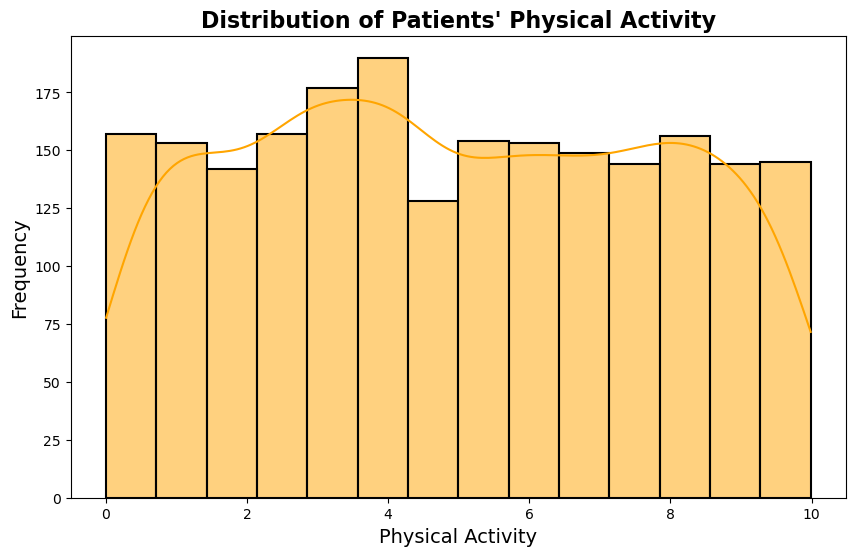

In [38]:
# Create a histogram with KDE (Kernel Density Estimate) for the Age distribution
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
# KDE allows us to visaulize the distribution of data in a dataset 
# Shows probability density function (PDF) - similar to histogram except it shows a continuous curve 
sns.histplot(df['PhysicalActivity'], kde=True, color='orange', edgecolor='black', linewidth=1.5)

# Add title and labels with improved formatting
plt.title('Distribution of Patients\' Physical Activity', fontsize=16, fontweight='bold')
plt.xlabel('Physical Activity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.grid(False)
plt.show()

Key Observations

**Physical Activity Distribution**
- Physical Activty isn't uniformly distributed, ranging from 0 to 10 hours of activity
- There are is a physical activity group with slightly higher frequencies (4)

**Kernerl Density Estimate (KDE)**
- The distribution isn't flat, but peaks at a certain section (around 3 and 4)

#### Are there more females than males that are diagnosed with Alzeheimers? 

<Figure size 1000x600 with 0 Axes>

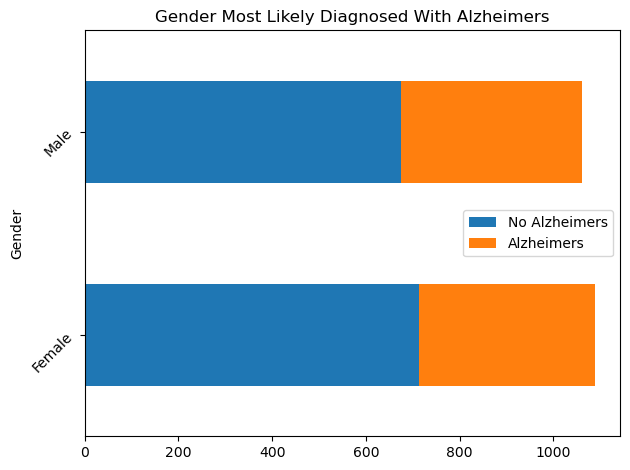

In [41]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
df.groupby(['Gender', 'Diagnosis']).size().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='barh', stacked=True)
plt.title('Gender Most Likely Diagnosed With Alzheimers')
plt.yticks(ticks=[0, 1], rotation = 45, labels=['Male', 'Female'])  # Rotate y-axis labels for better visibility and define labels 
plt.gca().invert_yaxis()
plt.legend(labels=['No Alzheimers', 'Alzheimers'])
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Key Observations

**Gender Distribution**
- The stacked bar chart shows an even number of male and females that are diagnosed with Alzheimers

Gender doesn't seem to be affected on whether they are diagnosed with Alzheimers

#### Does ethnicity determine the likelihood of being diagnosed with Alzheimers? 

<Figure size 1000x600 with 0 Axes>

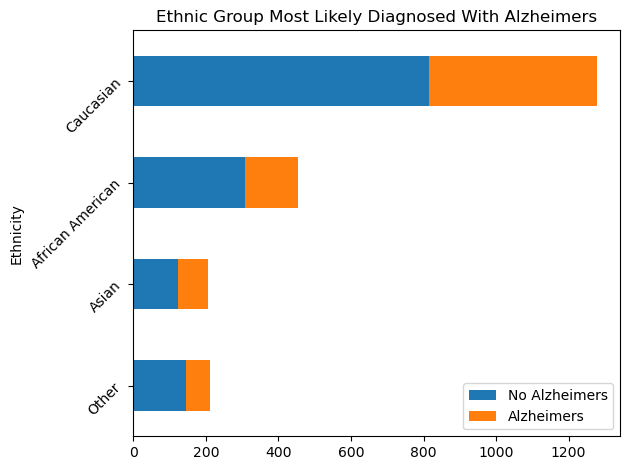

In [44]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
df.groupby(['Ethnicity', 'Diagnosis']).size().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='barh', stacked=True)
plt.title('Ethnic Group Most Likely Diagnosed With Alzheimers')
plt.yticks(ticks=[0, 1, 2, 3], rotation = 45, labels=['Caucasian', 'African American', 'Asian', 'Other'])  # Rotate y-axis labels for better visibility and define labels 
plt.gca().invert_yaxis()
plt.legend(labels=['No Alzheimers', 'Alzheimers'])
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Key Observations 

**Ethnicity Distribution**
- From the stacked bar chart, Caucasians are the most likely group to be diagnosed with Alzheimers with African Americans coming in second, Asians third, and Other in last

#### How is Age distributed by Gender? 

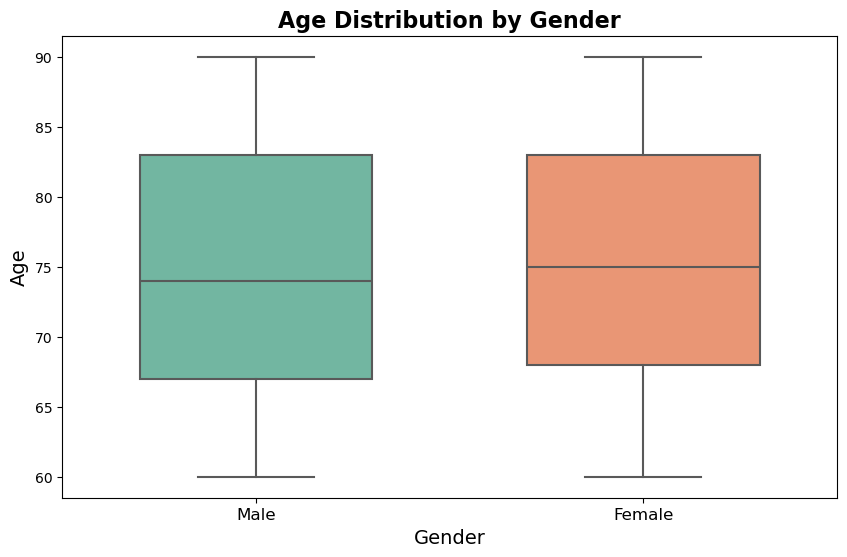

In [47]:
# Create a boxplot for Age by Gender
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
sns.boxplot(data=df, x='Gender', y='Age', palette='Set2', width=0.6)

# Add title and labels with improved formatting
plt.title('Age Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Show tick labels
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], fontsize=12)  # Rotate y-axis labels for better visibility and define labels 

plt.show()

Key Observations 

**Age Distribution**
- There doesn't appear to be a big gap in ages based on gender
- Both genders appear to have similar distribution with age

**Gender Distribution**
- The boxplots show that there isn't a huge disadvantage for people in a particular age based on gender
- In fact, both boxplots are similar and includes a balanced dataset for males and females 

### 3. Feature Selection

#### First, let's take care of our imbalanced dataset

As you may recall, we had an imbalanced dataset where **64.6%** of patients did not have Alzheimers while **35.4%** of patients did have Alzheimers. 

This can lead to bias that may make the model lean one way than another. 

To alleviate this bias, we will try out down sampling the dataset

In [51]:
# Separate majority and minority classes
df_majority = df[df.Diagnosis == 0]
df_minority = df[df.Diagnosis == 1]

# Downsample majority class to match minority class size
df_majority_downsampled = resample(df_majority,
                                    replace=False,  # Sample without replacement
                                    n_samples=len(df_minority),  # Match minority class size
                                    random_state=1)  # Ensure reproducibility

# Combine minority class with downsampled majority class
df_ds = pd.concat([df_minority, df_majority_downsampled])

# Shuffle the resulting dataframe
df_ds = df_ds.sample(frac=1, random_state=1).reset_index(drop=True)

# Verify the new class distribution
print(df_ds['Diagnosis'].value_counts())

# Verify new dataframe shape
print(df_ds.shape)

Diagnosis
0    760
1    760
Name: count, dtype: int64
(1520, 31)


In [52]:
# View summary of dataset after downsampling the data
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1520 non-null   int64  
 1   Gender                     1520 non-null   int64  
 2   Ethnicity                  1520 non-null   int64  
 3   BMI                        1520 non-null   float64
 4   Smoking                    1520 non-null   int64  
 5   AlcoholConsumption         1520 non-null   float64
 6   PhysicalActivity           1520 non-null   float64
 7   DietQuality                1520 non-null   float64
 8   SleepQuality               1520 non-null   float64
 9   CardiovascularDisease      1520 non-null   int64  
 10  Diabetes                   1520 non-null   int64  
 11  Depression                 1520 non-null   int64  
 12  HeadInjury                 1520 non-null   int64  
 13  Hypertension               1520 non-null   int64

#### Now that we down sampled our data, we need to perform feature selection 

**Correlation Analysis**

Correlation analysis will help us to determine which variables are worth diving into to prepare for model building

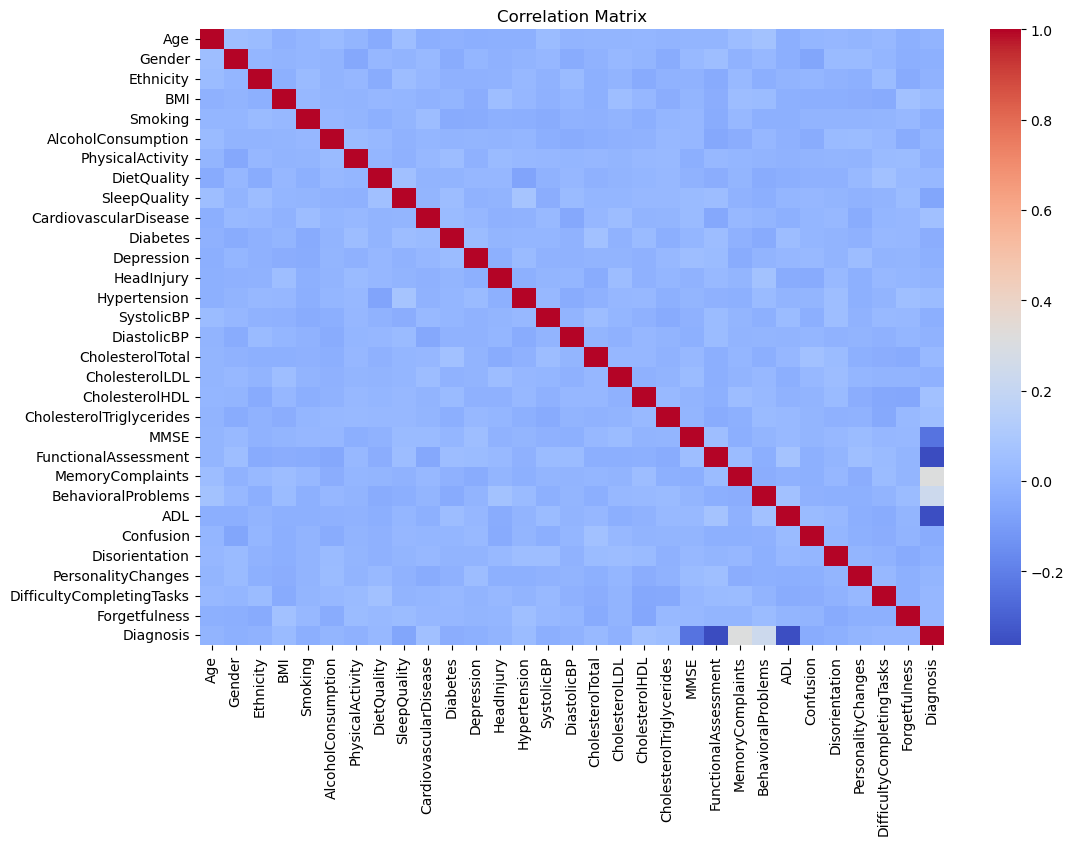

Diagnosis                    1.000000e+00
MemoryComplaints             3.133142e-01
BehavioralProblems           2.361651e-01
CholesterolHDL               5.765462e-02
CardiovascularDisease        5.496300e-02
CholesterolTriglycerides     4.336827e-02
Hypertension                 3.469656e-02
BMI                          2.547448e-02
CholesterolTotal             2.398479e-02
DietQuality                  1.771401e-02
DifficultyCompletingTasks    1.260823e-02
Forgetfulness                1.008140e-02
AlcoholConsumption           8.756489e-05
PersonalityChanges           4.861639e-17
HeadInjury                  -2.360704e-03
Age                         -5.842282e-03
DiastolicBP                 -9.410236e-03
Ethnicity                   -1.195499e-02
PhysicalActivity            -1.511272e-02
CholesterolLDL              -1.647500e-02
Disorientation              -1.829355e-02
Gender                      -1.973700e-02
Depression                  -2.275043e-02
SystolicBP                  -2.430

In [55]:
# Calculate correlation matrix
correlation_matrix = df_ds.corr()

# Get correlations with the target variable
target_correlation = correlation_matrix['Diagnosis'].sort_values(ascending=False)

# Plot correlation heatmap for features with highest correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(target_correlation)